When evaluating models that predict continuous numerical values (regression tasks), we use different metrics than for classification. These metrics quantify how close the model's predictions are to the actual values.

---

## Evaluation Metrics for Regression Models

This document covers:

* **Data Prep:** Loads the California Housing dataset, splits, and scales it.
* **Model Training:** Trains a simple `Ridge` regression model.
* **Core Metrics:** Calculates and explains:
    * `mean_absolute_error` (MAE): Average absolute error in original units.
    * `mean_squared_error` (MSE): Average squared error, penalizes large errors more.
    * Root Mean Squared Error (RMSE): Square root of MSE, in original units.
    * `r2_score` (R-squared): Proportion of variance explained by the model.
* **Visualizing Errors:** Demonstrates plotting:
    * Actual vs. Predicted values scatter plot.
    * Residual distribution histogram.
    * Residuals vs. Predicted values scatter plot (to check for patterns).
* **Choosing Metrics:** Provides guidance on interpreting and selecting appropriate metrics based on the problem context.

---

These metrics and visualizations are essential for understanding how well your regression model is performing and where it might be making errors.

--- Loading California Housing Dataset ---
Training set shape: X=(15480, 8), y=(15480,)
Test set shape: X=(5160, 8), y=(5160,)

--- Training Sample Model (Ridge Regression) ---
Model trained and predictions made.
------------------------------
--- Evaluating Regression Model ---
a) Mean Absolute Error (MAE): 0.5297
   Interpretation: On average, the model's prediction is off by approx. ${mae*100000:.0f}.

b) Mean Squared Error (MSE): 0.5411
   Interpretation: Units are squared ($100k^2), harder to interpret directly.

c) Root Mean Squared Error (RMSE): 0.7356
   Interpretation: Typical error magnitude is approx. $73559.

d) R-squared (R²): 0.5911
   Interpretation: Approx. 59.1% of the variance in median house value
                   is explained by the model based on the test set.
------------------------------
--- Visualizing Errors ---


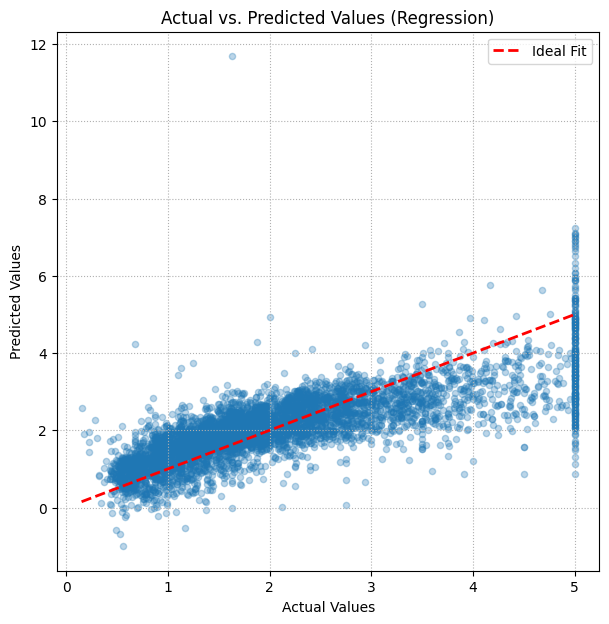

Generated Actual vs Predicted scatter plot.


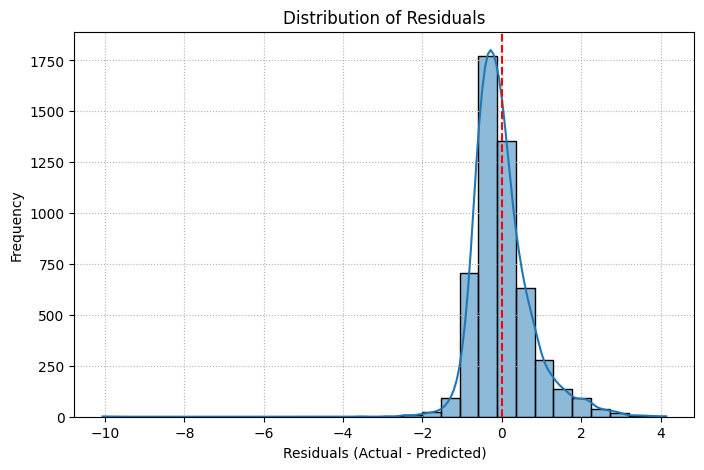

Generated Residual Histogram.


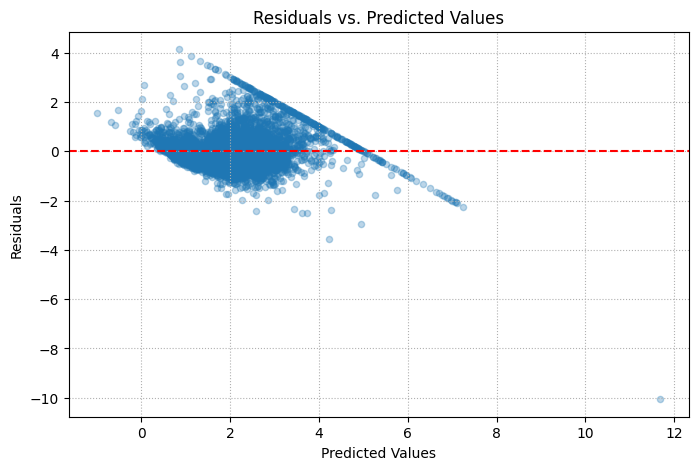

Generated Residuals vs Predicted scatter plot.
------------------------------
--- Choosing the Right Metric ---
- MAE: Easy to interpret, robust to outliers. Good for explaining average error magnitude.
- RMSE: More sensitive to large errors than MAE. Good if large errors are particularly undesirable.
- MSE: Less interpretable units, but often used in optimization algorithms.
- R²: Indicates the proportion of variance explained. Useful for comparing model fit relative to a baseline.
- Context matters! The 'best' metric depends on the specific business problem and the cost associated with different types of errors.
------------------------------


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge # Example regressors
# Metrics
from sklearn.metrics import (mean_absolute_error,
                             mean_squared_error,
                             r2_score)
# For RMSE, we use np.sqrt on MSE

# --- 1. Load and Prepare Data ---
# Using California Housing dataset
print("--- Loading California Housing Dataset ---")
housing = fetch_california_housing(as_frame=True)
X = housing.data
y = housing.target # Target is median house value in $100,000s

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale features (good practice for linear models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set shape: X={X_train_scaled.shape}, y={y_train.shape}")
print(f"Test set shape: X={X_test_scaled.shape}, y={y_test.shape}")

# --- 2. Train a Sample Regression Model ---
print("\n--- Training Sample Model (Ridge Regression) ---")
# Using Ridge for slight regularization
model_reg = Ridge(alpha=1.0)
model_reg.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model_reg.predict(X_test_scaled)
print("Model trained and predictions made.")
print("-" * 30)


# --- 3. Common Regression Evaluation Metrics ---

print("--- Evaluating Regression Model ---")

# a) Mean Absolute Error (MAE)
# Definition: Average of the absolute differences between predicted and actual values.
# Formula: MAE = (1/n) * Σ|y_actual - y_predicted|
# Interpretation: Represents the average magnitude of errors in the predictions,
#                 in the original units of the target variable. Easy to understand.
#                 Less sensitive to large outliers compared to MSE/RMSE. Lower is better.
mae = mean_absolute_error(y_test, y_pred)
print(f"a) Mean Absolute Error (MAE): {mae:.4f}")
print("   Interpretation: On average, the model's prediction is off by approx. ${mae*100000:.0f}.")


# b) Mean Squared Error (MSE)
# Definition: Average of the squared differences between predicted and actual values.
# Formula: MSE = (1/n) * Σ(y_actual - y_predicted)^2
# Interpretation: Penalizes larger errors more heavily due to squaring.
#                 Units are the square of the target variable's units (less intuitive).
#                 Useful for optimization (differentiable). Lower is better.
mse = mean_squared_error(y_test, y_pred)
print(f"\nb) Mean Squared Error (MSE): {mse:.4f}")
print("   Interpretation: Units are squared ($100k^2), harder to interpret directly.")


# c) Root Mean Squared Error (RMSE)
# Definition: Square root of the MSE.
# Formula: RMSE = sqrt(MSE)
# Interpretation: Represents the standard deviation of the prediction errors.
#                 Units are the same as the target variable (more interpretable than MSE).
#                 Still penalizes larger errors more than MAE. Lower is better.
rmse = np.sqrt(mse) # Or mean_squared_error(y_test, y_pred, squared=False)
print(f"\nc) Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"   Interpretation: Typical error magnitude is approx. ${rmse*100000:.0f}.")


# d) R-squared (R²) - Coefficient of Determination
# Definition: Proportion of the variance in the target variable that is predictable
#             from the independent variables (features). Compares the model's performance
#             to a baseline model that always predicts the mean of the target variable.
# Formula: R² = 1 - (Sum of Squared Residuals / Total Sum of Squares) = 1 - (MSE / Var(y))
# Interpretation: Ranges from -infinity to 1.
#                 1: Perfect prediction. Model explains all the variance.
#                 0: Model performs no better than predicting the mean.
#                 <0: Model performs worse than predicting the mean.
#                 Higher is generally better (closer to 1).
r2 = r2_score(y_test, y_pred)
# Can also use the model's score method for regressors (usually calculates R²)
# r2_score_method = model_reg.score(X_test_scaled, y_test)
print(f"\nd) R-squared (R²): {r2:.4f}")
# print(f"   R² from model.score(): {r2_score_method:.4f}")
print(f"   Interpretation: Approx. {r2*100:.1f}% of the variance in median house value")
print("                   is explained by the model based on the test set.")


# e) Adjusted R-squared (Not directly in sklearn.metrics, more statistical)
# R² tends to increase as more features are added, even if they aren't useful.
# Adjusted R² penalizes the score for adding features that don't improve the model significantly.
# Formula: Adj. R² = 1 - [(1 - R²) * (n - 1) / (n - k - 1)] where n=samples, k=features
# print("\ne) Adjusted R-squared: Requires manual calculation or stats libraries (like statsmodels).")
print("-" * 30)


# --- 4. Visualizing Errors ---
print("--- Visualizing Errors ---")

# a) Actual vs. Predicted Plot
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred, alpha=0.3, s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2, label='Ideal Fit')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Regression)")
plt.legend()
plt.grid(True, linestyle=':')
plt.show()
print("Generated Actual vs Predicted scatter plot.")

# b) Residual Plot
# Residuals = Actual Values - Predicted Values
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.axvline(0, color='red', linestyle='--') # Line at zero error
plt.grid(True, linestyle=':')
plt.show()
print("Generated Residual Histogram.")
# Ideally, residuals should be roughly normally distributed around zero with no clear patterns.

plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, alpha=0.3, s=20)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.grid(True, linestyle=':')
plt.show()
print("Generated Residuals vs Predicted scatter plot.")
# Ideally, this plot should show no discernible pattern (random scatter around zero).
# Patterns (like a curve or funnel shape) might indicate issues like non-linearity
# or heteroscedasticity (non-constant error variance).
print("-" * 30)


# --- 5. Choosing the Right Metric ---
print("--- Choosing the Right Metric ---")
print("- MAE: Easy to interpret, robust to outliers. Good for explaining average error magnitude.")
print("- RMSE: More sensitive to large errors than MAE. Good if large errors are particularly undesirable.")
print("- MSE: Less interpretable units, but often used in optimization algorithms.")
print("- R²: Indicates the proportion of variance explained. Useful for comparing model fit relative to a baseline.")
print("- Context matters! The 'best' metric depends on the specific business problem and the cost associated with different types of errors.")
print("-" * 30)